In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction import FeatureHasher

In [567]:
# Load the ASHRAE CSV file
file_path = "simplified_ashrae_data.csv"
simple_df = pd.read_csv(file_path)
simple_df.head()

C:\Users\sakif\AppData\Local\Temp\ipykernel_144992\4289044780.py:3: DtypeWarning: Columns (8,15) have mixed types. Specify dtype option on import or set low_memory=False.
  simple_df = pd.read_csv(file_path)


,year,season,koppen_climate,climate_description,city,country,building_type,cooling_strategy,heating_strategy,age,...,standard_effective_temperature,clothing_insulation,metabolic_rate,air_temperature,operative_temperature,relative_humidity,air_velocity,subject_height,subject_weight,outdoor_air_temperature
0,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,NaN,15.0,...,NaN,0.25,NaN,24.2,NaN,50.2,0.06,162.0,NaN,25.0
1,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,NaN,15.0,...,NaN,0.25,NaN,24.2,NaN,50.2,0.06,154.0,NaN,25.0
2,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,NaN,15.0,...,NaN,0.27,NaN,24.2,NaN,50.2,0.06,173.0,NaN,25.0
3,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,NaN,14.0,...,NaN,0.23,NaN,24.2,NaN,50.2,0.06,167.0,NaN,25.0
4,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,NaN,15.0,...,NaN,0.34,NaN,24.2,NaN,50.2,0.06,178.0,NaN,25.0


In [568]:
def check_column(dataframe, column_name):
    """
    Check the data type and number of unique values in a column.
    """
    unique_values = dataframe[column_name].unique()
    print(dataframe[column_name].apply(type).unique())
    print(unique_values)
    print(
        f"Missing Values in {column_name} After Imputation:",
        dataframe[column_name].isnull().sum(),
    )

In [569]:
# Check the data types of all columns in the DataFrame
print("Data Types of All Columns:\n")
print(simple_df.dtypes)

# Optionally, count the number of columns by data type
data_type_summary = simple_df.dtypes.value_counts()
print("\nSummary of Data Types:\n")
print(data_type_summary)

Data Types of All Columns:

year                               float64
season                              object
koppen_climate                      object
climate_description                 object
city                                object
country                             object
building_type                       object
cooling_strategy                    object
heating_strategy                    object
age                                float64
sex                                 object
thermal_sensation                  float64
thermal_sensation_acceptability    float64
thermal_preference                  object
air_movement_preference             object
thermal_comfort                     object
standard_effective_temperature     float64
clothing_insulation                float64
metabolic_rate                     float64
air_temperature                    float64
operative_temperature              float64
relative_humidity                  float64
air_velocity              

In [570]:
# Drop rows where 'thermal_preference' is null
simple_df = simple_df.dropna(subset=["thermal_preference"])

In [571]:
simple_df.shape

(85500, 26)

In [572]:
# Replace multiple types of null values with np.nan
simple_df["thermal_comfort"] = simple_df["thermal_comfort"].replace(["Na", " "], np.nan)

# Convert the thermal_comfort column to float64
simple_df["thermal_comfort"] = simple_df["thermal_comfort"].astype(float)

In [573]:
processed_df = simple_df[
    [
        "year",
        "season",
        "koppen_climate",
        "climate_description",
        "city",
        "country",
        "building_type",
        "cooling_strategy",
        "age",
        "sex",
        "thermal_sensation",
        "thermal_comfort",
        "clothing_insulation",
        "metabolic_rate",
        "air_temperature",
        "relative_humidity",
        "air_velocity",
        "outdoor_air_temperature",
        "thermal_preference",
    ]
]

In [574]:
processed_df.sample(n=10)

,year,season,koppen_climate,climate_description,city,country,building_type,cooling_strategy,age,sex,thermal_sensation,thermal_comfort,clothing_insulation,metabolic_rate,air_temperature,relative_humidity,air_velocity,outdoor_air_temperature,thermal_preference
104308,1995.0,Autumn,As,Tropical dry savanna,Honolulu,USA,Classroom,Naturally Ventilated,16.0,Male,0.0,5.0,0.45,1.20,NaN,61.2,NaN,NaN,no change
50746,1998.0,Autumn,Csb,Warm-summer Mediterranean,Porto,Portugal,Office,Naturally Ventilated,NaN,Male,1.0,NaN,0.66,1.60,24.5,61.0,0.08,14.3,cooler
67509,2012.0,Summer,BSh,Hot semi-arid,Ahmedabad,India,Office,Mixed Mode,55.0,Male,0.0,6.0,0.73,1.10,30.3,71.2,0.38,29.5,no change
85216,1984.0,Summer,Cfa,Humid subtropical,Brisbane,Australia,Office,Air Conditioned,18.0,Female,-1.0,NaN,0.47,1.11,21.7,52.6,0.15,NaN,no change
60692,2010.0,Winter,Am,Tropical monsoon,Maceio,Brazil,Classroom,Naturally Ventilated,20.0,Female,-1.0,NaN,0.50,1.20,24.6,72.6,0.41,25.0,no change
103,2011.0,Summer,Cfa,Humid subtropical,Texas,USA,Office,Air Conditioned,26.0,NaN,-1.0,3.0,0.57,1.70,23.8,44.3,0.33,32.8,warmer
12234,2012.0,Autumn,Csc,Cool-summer Mediterranean,Alameda,USA,Office,Naturally Ventilated,NaN,NaN,0.0,NaN,0.91,NaN,21.6,43.5,NaN,11.0,cooler
57230,2010.0,Autumn,Cfa,Humid subtropical,Florianopolis,Brazil,Office,Mixed Mode,33.0,Male,0.0,NaN,0.60,1.10,24.2,63.6,0.10,23.0,no change
74040,2014.0,Summer,BWh,Hot desert,Bandar Abbas,Iran,Multifamily housing,Naturally Ventilated,35.0,NaN,1.0,NaN,0.61,1.20,33.9,64.0,0.09,31.9,cooler
49342,1996.0,Summer,Csa,Hot-summer Mediterranean,Midland,UK,Office,Naturally Ventilated,NaN,NaN,0.0,NaN,0.53,1.20,24.7,38.3,0.05,16.0,cooler


In [575]:
# Define numerical and categorical columns
numerical_cols = processed_df.select_dtypes(include=["float64", "int64"]).columns
categorical_cols = processed_df.select_dtypes(include=["object"]).columns

# Exclude the target variable from processing
numerical_cols = numerical_cols.drop("thermal_preference", errors="ignore")

# Impute numerical columns with median
imputer_numeric = SimpleImputer(strategy="median")
processed_df[numerical_cols] = imputer_numeric.fit_transform(
    processed_df[numerical_cols]
)

# Impute categorical columns with the most frequent value
imputer_categorical = SimpleImputer(strategy="most_frequent")
processed_df[categorical_cols] = imputer_categorical.fit_transform(
    processed_df[categorical_cols]
)

processed_df.head()

C:\Users\sakif\AppData\Local\Temp\ipykernel_144992\78859352.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df[numerical_cols] = imputer_numeric.fit_transform(
C:\Users\sakif\AppData\Local\Temp\ipykernel_144992\78859352.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df[categorical_cols] = imputer_categorical.fit_transform(


,year,season,koppen_climate,climate_description,city,country,building_type,cooling_strategy,age,sex,thermal_sensation,thermal_comfort,clothing_insulation,metabolic_rate,air_temperature,relative_humidity,air_velocity,outdoor_air_temperature,thermal_preference
0,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,15.0,Female,-0.5,5.0,0.25,1.2,24.2,50.2,0.06,25.0,warmer
1,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,15.0,Female,-2.1,5.0,0.25,1.2,24.2,50.2,0.06,25.0,no change
2,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,15.0,Male,0.5,6.0,0.27,1.2,24.2,50.2,0.06,25.0,no change
3,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,14.0,Female,-2.5,4.0,0.23,1.2,24.2,50.2,0.06,25.0,no change
4,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,15.0,Male,-0.5,6.0,0.34,1.2,24.2,50.2,0.06,25.0,no change


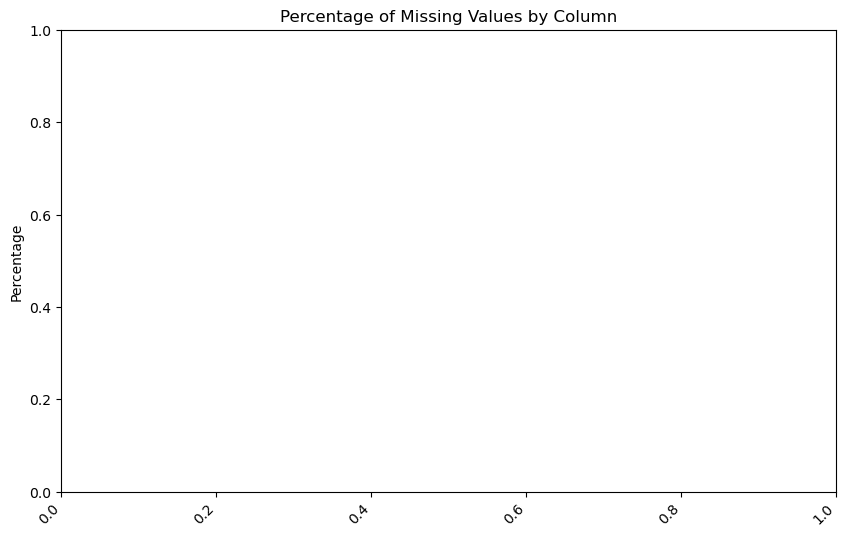

In [576]:
# Calculate missing values percentage
missing_percentage = processed_df.isnull().mean() * 100

# Filter columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.title("Percentage of Missing Values by Column")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha="right")
plt.show()

In [577]:
processed_df.shape

(85500, 19)

In [578]:
print(f"categorical_cols: {categorical_cols}")
print(f"numerical_cols: {numerical_cols}")

categorical_cols: Index(['season', 'koppen_climate', 'climate_description', 'city', 'country',
       'building_type', 'cooling_strategy', 'sex', 'thermal_preference'],
      dtype='object')
numerical_cols: Index(['year', 'age', 'thermal_sensation', 'thermal_comfort',
       'clothing_insulation', 'metabolic_rate', 'air_temperature',
       'relative_humidity', 'air_velocity', 'outdoor_air_temperature'],
      dtype='object')


# ENCODING

### Handling YEAR

In [579]:
# Calculate year_delta
processed_df["year_delta"] = processed_df["year"] - processed_df["year"].min()

# Insert the year_delta column right after the year column
year_index = processed_df.columns.get_loc("year")  # Get the index of the 'year' column
cols = list(processed_df.columns)  # Get all columns as a list
# Rearrange columns: Insert year_delta after year
cols.insert(year_index + 1, cols.pop(cols.index("year_delta")))
processed_df = processed_df[cols]  # Reorder columns in the DataFrame

# Verify the placement of year_delta
processed_df.head()

C:\Users\sakif\AppData\Local\Temp\ipykernel_144992\3044924162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df["year_delta"] = processed_df["year"] - processed_df["year"].min()


,year,year_delta,season,koppen_climate,climate_description,city,country,building_type,cooling_strategy,age,sex,thermal_sensation,thermal_comfort,clothing_insulation,metabolic_rate,air_temperature,relative_humidity,air_velocity,outdoor_air_temperature,thermal_preference
0,2000.0,18.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,15.0,Female,-0.5,5.0,0.25,1.2,24.2,50.2,0.06,25.0,warmer
1,2000.0,18.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,15.0,Female,-2.1,5.0,0.25,1.2,24.2,50.2,0.06,25.0,no change
2,2000.0,18.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,15.0,Male,0.5,6.0,0.27,1.2,24.2,50.2,0.06,25.0,no change
3,2000.0,18.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,14.0,Female,-2.5,4.0,0.23,1.2,24.2,50.2,0.06,25.0,no change
4,2000.0,18.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,15.0,Male,-0.5,6.0,0.34,1.2,24.2,50.2,0.06,25.0,no change


### Handling SEASON, KOPPEN_CLIMATE, BUILDING_TYPE, COOLING_STRATEGY

### Columns in the Dataset

| **Column**               | **Encoding Recommendation**                              | **Reason**                                                                                   |
|--------------------------|---------------------------------------------------------|---------------------------------------------------------------------------------------------|
| `year`                   | No Encoding                                             | Treat as-is or use relative features (e.g., `year_delta`).                                  |
| `season`                 | One-Hot Encoding                                        | Low cardinality and categorical. No ordinal relationship.                                   |
| `koppen_climate`         | One-Hot Encoding                                        | Moderate cardinality. One-hot if space allows; label encoding for simpler models.           |
| `climate_description`    | Hash Encoding                                           | High cardinality (likely descriptive text). Hashing prevents dimensionality explosion.       |
| `city`                   | Hash Encoding                                           | High cardinality. Hashing works well for unseen cities; frequency encoding maintains trends. |
| `country`                | Hash Encoding                                           | Moderate cardinality. Use label encoding for tree-based models or frequency encoding.       |
| `building_type`          | One-Hot Encoding                                        | Low cardinality. Categories like residential/commercial.                                    |
| `cooling_strategy`       | One-Hot Encoding                                        | Low cardinality. Represents distinct strategies.                                            |
| `age`                    | No Encoding                                             | Continuous numerical feature.                                                              |
| `sex`                    | Label Encoding                                          | Binary categorical feature.                                                                |
| `thermal_sensation`      | No Encoding                                             | Numerical target-like feature.                                                             |
| `thermal_comfort`        | No Encoding                                             | Ordinal variable; consider scaling instead of encoding.                                     |
| `clothing_insulation`    | No Encoding                                             | Continuous numerical feature.                                                              |
| `metabolic_rate`         | No Encoding                                             | Continuous numerical feature.                                                              |
| `air_temperature`        | No Encoding                                             | Continuous numerical feature.                                                              |
| `relative_humidity`      | No Encoding                                             | Continuous numerical feature.                                                              |
| `air_velocity`           | No Encoding                                             | Continuous numerical feature.                                                              |
| `outdoor_air_temperature`| No Encoding                                             | Continuous numerical feature.                                                              |
| `thermal_preference`     | Label Encoding                                          | Target variable for classification tasks.                                                  |


### Label Encode Sex and Thermal Preference

In [580]:
# Label encode binary categories (e.g., sex)
if "sex" in categorical_cols:
    label_encoder = LabelEncoder()
    processed_df["sex"] = label_encoder.fit_transform(processed_df["sex"])
    processed_df["thermal_preference"] = label_encoder.fit_transform(
        processed_df["thermal_preference"]
    )

In [581]:
for col in categorical_cols:
    unique_values = processed_df[col].unique()
    print(f"Unique values in column '{col} {len(unique_values)}': {unique_values}\n")

Unique values in column 'season 4': ['Summer' 'Autumn' 'Winter' 'Spring']

Unique values in column 'koppen_climate 15': ['Cfa' 'Csb' 'Aw' 'BSh' 'Csa' 'Csc' 'Af' 'Cfb' 'Am' 'BWh' 'Cwa' 'Cwb'
 'Dwa' 'Dfb' 'As']

Unique values in column 'climate_description 18': ['Humid subtropical' 'Warm-summer Mediterranean' 'Tropical wet savanna'
 'Hot semi-arid' 'Hot-summer Mediterranean' 'Cool-summer Mediterranean'
 'Tropical rainforest' 'Temperate oceanic' 'Tropical monsoon' 'Hot desert'
 'Monsoon-influenced humid subtropical' 'Subtropical highland'
 'Monsoon-influenced hot-summer humid continental'
 'Cool-summer mediterranean' 'Warm-summer humid continental' 'Oceanic'
 'Hot-summer mediterranean' 'Tropical dry savanna']

Unique values in column 'city 69': ['Tokyo' 'Texas' 'Berkeley' 'Chennai' 'Hyderabad' 'Ilam' 'Alameda'
 'Makati' 'Sydney' 'Jaipur' 'Kuala Lumpur' 'Midland' 'Kota Kinabalu'
 'Beverly Hills' 'Putra Jaya' 'Kinarut' 'Kuching' 'Bedong' 'Bratislava'
 'Elsinore' 'London' 'Lyon' 'Gothenburg'

### Hash Encode Climate Description, City, and Country

In [582]:
# Initialize the hasher
hasher = FeatureHasher(
    n_features=10, input_type="string"
)  # Adjust n_features as needed

# Apply hashing to 'country', 'city', and 'climate_description'
hashed_country = hasher.transform(
    processed_df["country"].astype(str).map(lambda x: [x])
)
hashed_city = hasher.transform(processed_df["city"].astype(str).map(lambda x: [x]))
hashed_climate_description = hasher.transform(
    processed_df["climate_description"].astype(str).map(lambda x: [x])
)

# Convert the hashed features into DataFrames
hashed_country_df = pd.DataFrame(
    hashed_country.toarray(), columns=[f"hashed_country_{i}" for i in range(10)]
)
hashed_city_df = pd.DataFrame(
    hashed_city.toarray(), columns=[f"hashed_city_{i}" for i in range(10)]
)
hashed_climate_description_df = pd.DataFrame(
    hashed_climate_description.toarray(),
    columns=[f"hashed_climate_{i}" for i in range(10)],
)

# Concatenate the hashed columns with the original DataFrame
processed_df = pd.concat(
    [
        processed_df.reset_index(drop=True),
        hashed_country_df,
        hashed_city_df,
        hashed_climate_description_df,
    ],
    axis=1,
)

# Drop the original columns if they are no longer needed
processed_df.drop(columns=["country", "city", "climate_description"], inplace=True)

# Display the updated DataFrame
print("Updated DataFrame with Hashing Encoding:\n")
processed_df.head()

Updated DataFrame with Hashing Encoding:



,year,year_delta,season,koppen_climate,building_type,cooling_strategy,age,sex,thermal_sensation,thermal_comfort,...,hashed_climate_0,hashed_climate_1,hashed_climate_2,hashed_climate_3,hashed_climate_4,hashed_climate_5,hashed_climate_6,hashed_climate_7,hashed_climate_8,hashed_climate_9
0,2000.0,18.0,Summer,Cfa,Classroom,Air Conditioned,15.0,0,-0.5,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000.0,18.0,Summer,Cfa,Classroom,Air Conditioned,15.0,0,-2.1,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000.0,18.0,Summer,Cfa,Classroom,Air Conditioned,15.0,1,0.5,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000.0,18.0,Summer,Cfa,Classroom,Air Conditioned,14.0,0,-2.5,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000.0,18.0,Summer,Cfa,Classroom,Air Conditioned,15.0,1,-0.5,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [583]:
processed_df.columns

Index(['year', 'year_delta', 'season', 'koppen_climate', 'building_type',
       'cooling_strategy', 'age', 'sex', 'thermal_sensation',
       'thermal_comfort', 'clothing_insulation', 'metabolic_rate',
       'air_temperature', 'relative_humidity', 'air_velocity',
       'outdoor_air_temperature', 'thermal_preference', 'hashed_country_0',
       'hashed_country_1', 'hashed_country_2', 'hashed_country_3',
       'hashed_country_4', 'hashed_country_5', 'hashed_country_6',
       'hashed_country_7', 'hashed_country_8', 'hashed_country_9',
       'hashed_city_0', 'hashed_city_1', 'hashed_city_2', 'hashed_city_3',
       'hashed_city_4', 'hashed_city_5', 'hashed_city_6', 'hashed_city_7',
       'hashed_city_8', 'hashed_city_9', 'hashed_climate_0',
       'hashed_climate_1', 'hashed_climate_2', 'hashed_climate_3',
       'hashed_climate_4', 'hashed_climate_5', 'hashed_climate_6',
       'hashed_climate_7', 'hashed_climate_8', 'hashed_climate_9'],
      dtype='object')

### One-Hot Encode Season, Koppen Climate, Building Type, and Cooling Strategy

In [584]:
# Perform one-hot encoding on the specified columns
columns_to_encode = ["season", "koppen_climate", "building_type", "cooling_strategy"]
processed_df = pd.get_dummies(processed_df, columns=columns_to_encode, drop_first=True)

# Display the updated DataFrame
print("Updated DataFrame with One-Hot Encoding:\n", processed_df.head())

Updated DataFrame with One-Hot Encoding:
      year  year_delta   age  sex  thermal_sensation  thermal_comfort  \
0  2000.0        18.0  15.0    0               -0.5              5.0   
1  2000.0        18.0  15.0    0               -2.1              5.0   
2  2000.0        18.0  15.0    1                0.5              6.0   
3  2000.0        18.0  14.0    0               -2.5              4.0   
4  2000.0        18.0  15.0    1               -0.5              6.0   

   clothing_insulation  metabolic_rate  air_temperature  relative_humidity  \
0                 0.25             1.2             24.2               50.2   
1                 0.25             1.2             24.2               50.2   
2                 0.27             1.2             24.2               50.2   
3                 0.23             1.2             24.2               50.2   
4                 0.34             1.2             24.2               50.2   

   ...  koppen_climate_Cwb  koppen_climate_Dfb  koppen_c

In [585]:
processed_df.sample(n=10)

,year,year_delta,age,sex,thermal_sensation,thermal_comfort,clothing_insulation,metabolic_rate,air_temperature,relative_humidity,...,koppen_climate_Cwb,koppen_climate_Dfb,koppen_climate_Dwa,building_type_Multifamily housing,building_type_Office,building_type_Others,building_type_Senior center,cooling_strategy_Mechanically Ventilated,cooling_strategy_Mixed Mode,cooling_strategy_Naturally Ventilated
45169,2010.0,28.0,49.0,1,-1.0,5.0,0.63,1.00,24.6,51.4,...,False,False,False,False,True,False,False,False,True,False
18128,1995.0,13.0,30.0,1,-1.0,5.0,0.65,1.20,21.8,55.3,...,False,False,False,False,True,False,False,False,False,False
5583,2012.0,30.0,30.0,0,3.0,5.0,0.63,1.00,25.7,40.0,...,False,False,False,False,True,False,False,False,True,False
27243,1996.0,14.0,30.0,1,2.0,5.0,0.64,1.30,26.0,29.1,...,False,False,False,False,True,False,False,False,False,False
29094,1995.0,13.0,30.0,1,-2.0,5.0,1.35,1.40,22.9,27.5,...,False,False,False,False,True,False,False,False,False,False
8257,2012.0,30.0,30.0,0,0.0,5.0,0.82,1.00,27.9,38.0,...,False,False,False,False,True,False,False,False,True,False
65820,1982.0,0.0,24.0,0,-3.0,5.0,0.44,1.21,24.0,46.7,...,False,False,False,False,True,False,False,False,False,False
80003,1993.0,11.0,46.0,1,0.0,5.0,0.44,1.99,24.7,44.0,...,False,False,False,False,True,False,False,False,False,False
55657,2012.0,30.0,55.0,0,0.0,6.0,0.63,1.30,25.5,53.1,...,True,False,False,False,True,False,False,False,False,True
14095,2011.0,29.0,21.0,1,-1.0,5.0,0.40,1.20,25.1,34.1,...,False,False,False,False,False,True,False,False,False,False


### Scaling Numerical Features without YEAR

In [586]:
# List of numerical columns to scale (excluding target variable, year, and non-numerical columns)
numerical_cols_wo_year = [
    "age",
    "thermal_sensation",
    "thermal_comfort",
    "clothing_insulation",
    "metabolic_rate",
    "air_temperature",
    "relative_humidity",
    "air_velocity",
    "outdoor_air_temperature",
]

# Verify the selected columns
print("Numerical Columns to Scale:", numerical_cols)

Numerical Columns to Scale: Index(['year', 'age', 'thermal_sensation', 'thermal_comfort',
       'clothing_insulation', 'metabolic_rate', 'air_temperature',
       'relative_humidity', 'air_velocity', 'outdoor_air_temperature'],
      dtype='object')


In [587]:
# Exclude the target variable from scaling
scaler = StandardScaler()
processed_df[numerical_cols_wo_year] = scaler.fit_transform(
    processed_df[numerical_cols_wo_year]
)
processed_df[numerical_cols].head()

,year,age,thermal_sensation,thermal_comfort,clothing_insulation,metabolic_rate,air_temperature,relative_humidity,air_velocity,outdoor_air_temperature
0,2000.0,-1.704718,-0.529958,0.210249,-1.587887,-0.045071,-0.06435,0.287875,-0.322638,0.935655
1,2000.0,-1.704718,-1.843510,0.210249,-1.587887,-0.045071,-0.06435,0.287875,-0.322638,0.935655
2,2000.0,-1.704718,0.291013,1.679869,-1.515120,-0.045071,-0.06435,0.287875,-0.322638,0.935655
3,2000.0,-1.809676,-2.171898,-1.259372,-1.660654,-0.045071,-0.06435,0.287875,-0.322638,0.935655
4,2000.0,-1.704718,-0.529958,1.679869,-1.260434,-0.045071,-0.06435,0.287875,-0.322638,0.935655


In [588]:
processed_df.head()

,year,year_delta,age,sex,thermal_sensation,thermal_comfort,clothing_insulation,metabolic_rate,air_temperature,relative_humidity,...,koppen_climate_Cwb,koppen_climate_Dfb,koppen_climate_Dwa,building_type_Multifamily housing,building_type_Office,building_type_Others,building_type_Senior center,cooling_strategy_Mechanically Ventilated,cooling_strategy_Mixed Mode,cooling_strategy_Naturally Ventilated
0,2000.0,18.0,-1.704718,0,-0.529958,0.210249,-1.587887,-0.045071,-0.06435,0.287875,...,False,False,False,False,False,False,False,False,False,False
1,2000.0,18.0,-1.704718,0,-1.843510,0.210249,-1.587887,-0.045071,-0.06435,0.287875,...,False,False,False,False,False,False,False,False,False,False
2,2000.0,18.0,-1.704718,1,0.291013,1.679869,-1.515120,-0.045071,-0.06435,0.287875,...,False,False,False,False,False,False,False,False,False,False
3,2000.0,18.0,-1.809676,0,-2.171898,-1.259372,-1.660654,-0.045071,-0.06435,0.287875,...,False,False,False,False,False,False,False,False,False,False
4,2000.0,18.0,-1.704718,1,-0.529958,1.679869,-1.260434,-0.045071,-0.06435,0.287875,...,False,False,False,False,False,False,False,False,False,False


In [589]:
# Export the sampled dataframe to a CSV file
processed_df.to_csv("fe_simplified_ashrae_data.csv", index=False)

In [590]:
# Sample Data for Checking
fe_sampled_simplified_ashrae_data = processed_df.sample(n=500)
fe_sampled_simplified_ashrae_data.to_csv(
    "fe_sampled_simplified_ashrae_data.csv", index=False
)

Why Scaling Should Follow Encoding
Numerical Feature Uniformity:

Scaling ensures all numerical features (including those derived from encoding) are on the same scale.
Impact of Encoding on Range:

Encoding methods like One-Hot Encoding and Hashing Encoding can create new features with varying ranges (e.g., 0 or 1 for one-hot, sparse ranges for hashing). These should be scaled along with other numerical features.
Model Compatibility:

Many machine learning algorithms (e.g., SVMs, K-Means, Neural Networks) are sensitive to feature scales. Ensuring uniform scaling across all features is critical.
What Happens if You Scale Before Encoding?
Loss of Scaling Consistency:
Encoded features will not benefit from the same scaling applied to other numerical features.
Inconsistent Feature Ranges:
Models may misinterpret differences between encoded and original numerical features.

### Scaling Validation

In [591]:
# Check mean and standard deviation of scaled features (for StandardScaler)
scaled_summary = processed_df[numerical_cols_wo_year].describe().T[["mean", "std"]]
print("Mean and Std of Scaled Features:\n", scaled_summary)

# Check min and max for MinMaxScaler
scaled_min_max = processed_df[numerical_cols_wo_year].agg(["min", "max"])
print("Min and Max of Scaled Features:\n", scaled_min_max)

Mean and Std of Scaled Features:
                                  mean       std
age                     -1.170110e-16  1.000006
thermal_sensation       -2.393407e-17  1.000006
thermal_comfort          1.967913e-16  1.000006
clothing_insulation     -2.978462e-16  1.000006
metabolic_rate           5.873820e-16  1.000006
air_temperature         -7.565826e-16  1.000006
relative_humidity       -3.084836e-16  1.000006
air_velocity             2.659341e-18  1.000006
outdoor_air_temperature  1.569011e-16  1.000006
Min and Max of Scaled Features:
           age  thermal_sensation  thermal_comfort  clothing_insulation  \
min -2.649343          -2.582383        -5.815195            -2.497477   
max  7.111780           2.343438         1.679869             7.944620   

     metabolic_rate  air_temperature  relative_humidity  air_velocity  \
min       -2.307013        -5.160154          -3.093512     -0.535750   
max       23.108987        10.976557           3.642319     27.879194   

     outdo

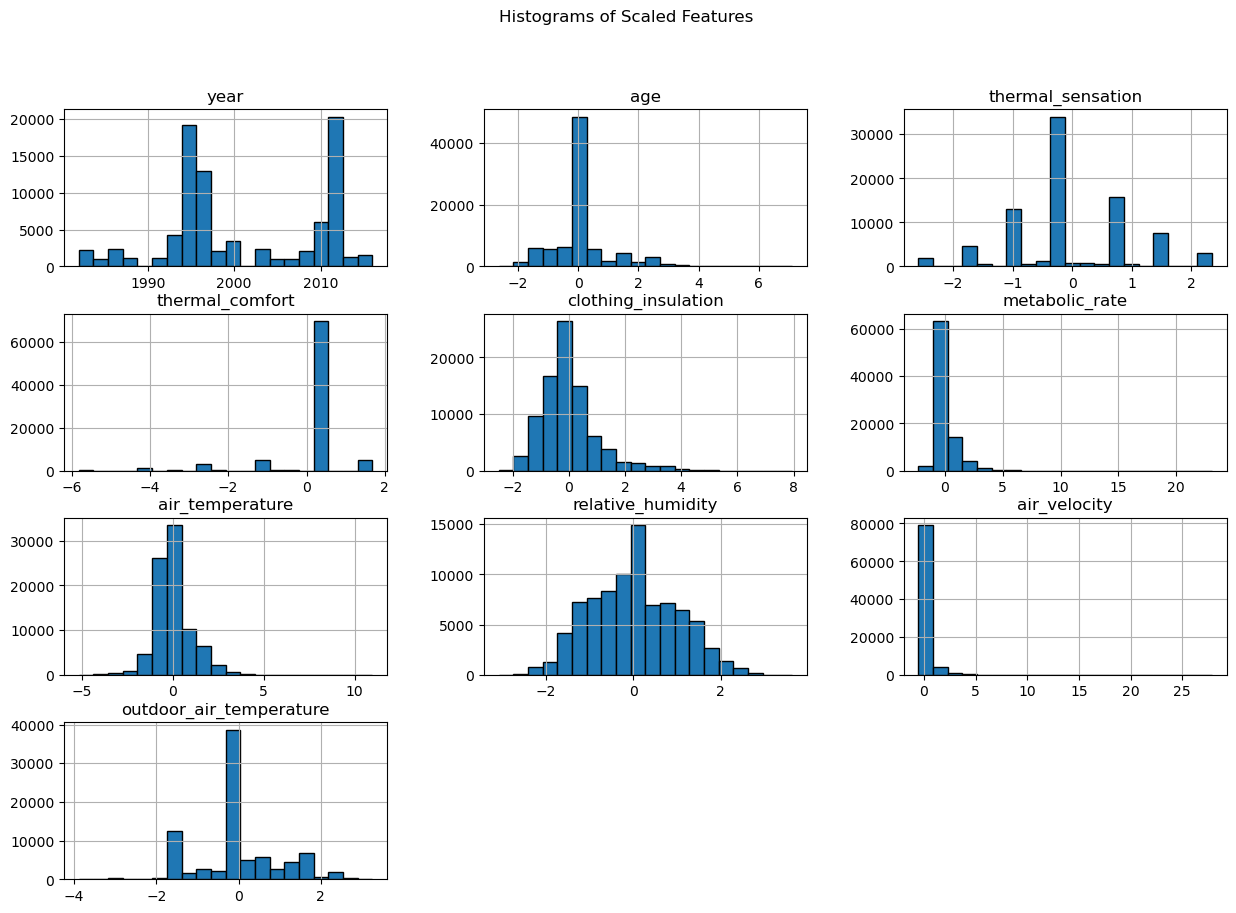

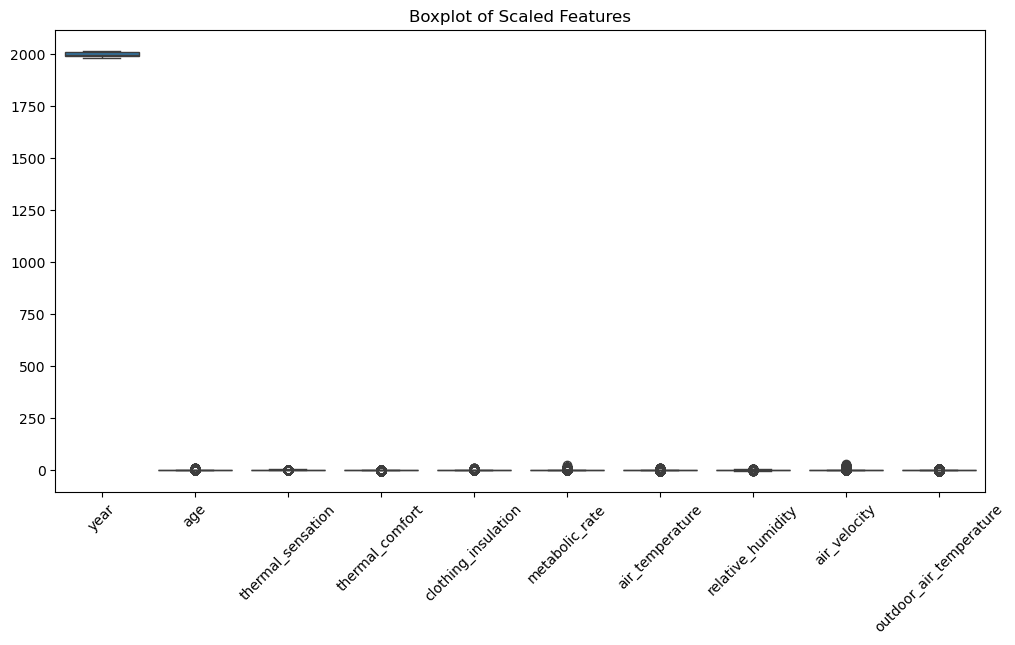

In [592]:
# Plot histograms for scaled features
processed_df[numerical_cols].hist(figsize=(15, 10), bins=20, edgecolor="black")
plt.suptitle("Histograms of Scaled Features")
plt.show()

# Boxplot for scaled features
plt.figure(figsize=(12, 6))
sns.boxplot(data=processed_df[numerical_cols])
plt.title("Boxplot of Scaled Features")
plt.xticks(rotation=45)
plt.show()

### ENCODING VALIDATION

In [593]:
# Check presence of encoded columns
encoded_columns = [
    col
    for col in processed_df.columns
    if col.startswith(
        ("season_", "koppen_climate_", "building_type_", "cooling_strategy_")
    )
]
print("Encoded Columns:\n", encoded_columns)

Encoded Columns:
 ['season_Spring', 'season_Summer', 'season_Winter', 'koppen_climate_Am', 'koppen_climate_As', 'koppen_climate_Aw', 'koppen_climate_BSh', 'koppen_climate_BWh', 'koppen_climate_Cfa', 'koppen_climate_Cfb', 'koppen_climate_Csa', 'koppen_climate_Csb', 'koppen_climate_Csc', 'koppen_climate_Cwa', 'koppen_climate_Cwb', 'koppen_climate_Dfb', 'koppen_climate_Dwa', 'building_type_Multifamily housing', 'building_type_Office', 'building_type_Others', 'building_type_Senior center', 'cooling_strategy_Mechanically Ventilated', 'cooling_strategy_Mixed Mode', 'cooling_strategy_Naturally Ventilated']


In [594]:
# Check if original columns were dropped
original_columns = ["season", "koppen_climate", "building_type", "cooling_strategy"]
missing_original_columns = [
    col for col in original_columns if col not in processed_df.columns
]
print("Original Columns Dropped:", missing_original_columns)

Original Columns Dropped: ['season', 'koppen_climate', 'building_type', 'cooling_strategy']


In [597]:
# Example: Verify One-Hot Encoding consistency for 'season'
season_encoded_columns = [col for col in encoded_columns if col.startswith("season_")]
season_sums = processed_df[season_encoded_columns].sum(axis=1)
print("Rows with Inconsistent One-Hot Encoding:", (season_sums != 1).sum())

Rows with Inconsistent One-Hot Encoding: 10423


In [598]:
missing_values = processed_df.isnull().sum()
print(
    "Missing Values After Scaling and Encoding:\n", missing_values[missing_values > 0]
)

Missing Values After Scaling and Encoding:
 Series([], dtype: int64)


In [599]:
# Confirm dataset shape before and after encoding/scaling
print("Dataset Shape After Scaling and Encoding:", processed_df.shape)

Dataset Shape After Scaling and Encoding: (85500, 67)


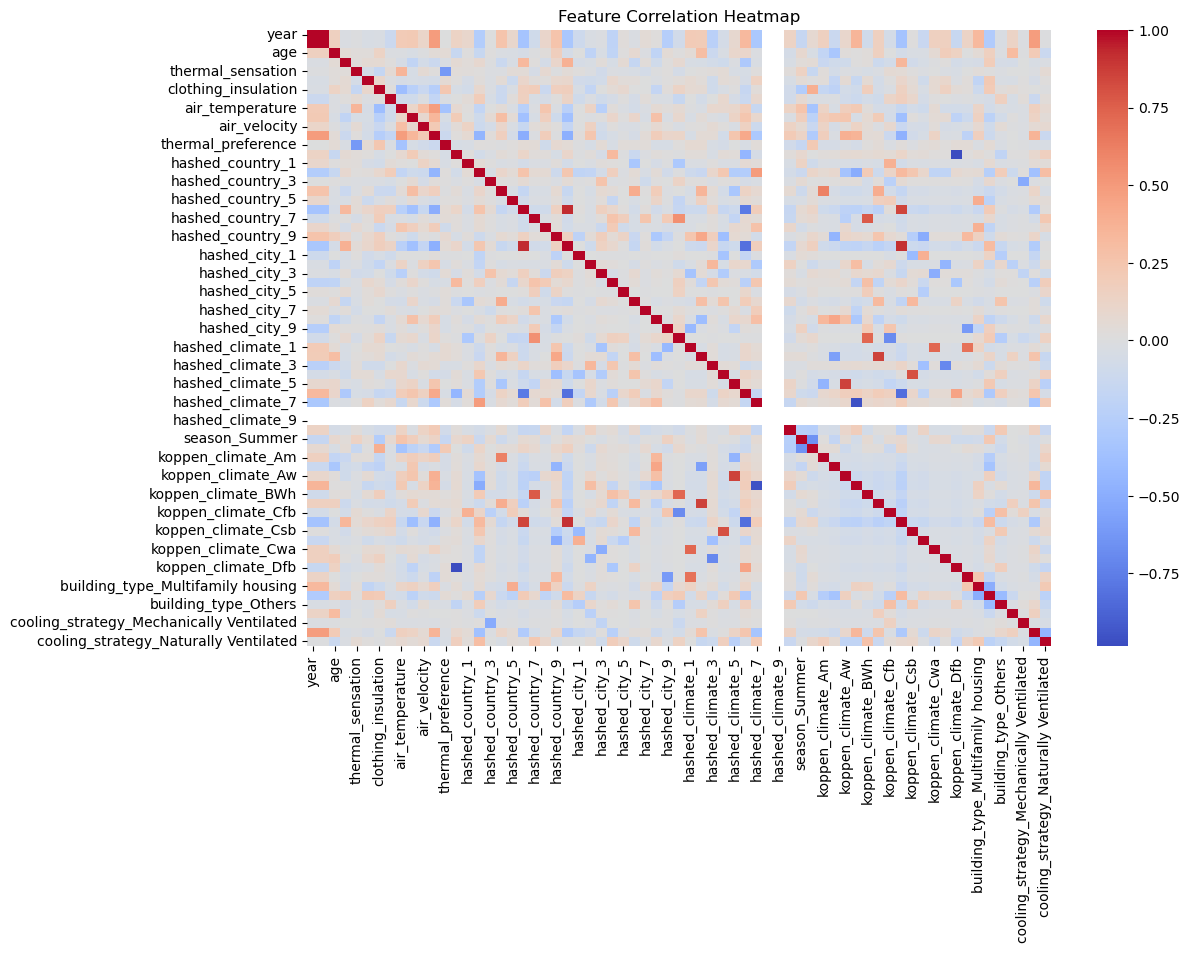

In [600]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(processed_df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [601]:
hashed_columns = [col for col in processed_df.columns if col.startswith("hashed_")]
print(
    "Distribution of Hashed Features:\n", processed_df[hashed_columns].sum().describe()
)

Distribution of Hashed Features:
 count       30.000000
mean       560.466667
std       9029.790171
min     -23087.000000
25%      -2270.750000
50%        392.500000
75%       4816.500000
max      23681.000000
dtype: float64


In [602]:
# Function to test encoding inconsistency for one-hot encoded columns
def check_one_hot_encoding_consistency(df, original_columns, encoded_prefixes):
    for original_col, prefix in zip(original_columns, encoded_prefixes):
        # Identify one-hot encoded columns for this feature
        encoded_columns = [col for col in df.columns if col.startswith(prefix)]

        # Check if rows sum to exactly 1
        row_sums = df[encoded_columns].sum(axis=1)
        inconsistent_rows = (row_sums != 1).sum()

        # Report inconsistencies
        print(f"Original Column: '{original_col}'")
        print(f"Encoded Columns: {encoded_columns}")
        print(f"Rows with Inconsistent Encoding: {inconsistent_rows}")
        print("-" * 50)


# Define original columns and their corresponding one-hot encoded prefixes
original_columns = ["season", "koppen_climate", "building_type", "cooling_strategy"]
encoded_prefixes = ["season_", "koppen_climate_", "building_type_", "cooling_strategy_"]

# Run the consistency check
check_one_hot_encoding_consistency(processed_df, original_columns, encoded_prefixes)

Original Column: 'season'
Encoded Columns: ['season_Spring', 'season_Summer', 'season_Winter']
Rows with Inconsistent Encoding: 10423
--------------------------------------------------
Original Column: 'koppen_climate'
Encoded Columns: ['koppen_climate_Am', 'koppen_climate_As', 'koppen_climate_Aw', 'koppen_climate_BSh', 'koppen_climate_BWh', 'koppen_climate_Cfa', 'koppen_climate_Cfb', 'koppen_climate_Csa', 'koppen_climate_Csb', 'koppen_climate_Csc', 'koppen_climate_Cwa', 'koppen_climate_Cwb', 'koppen_climate_Dfb', 'koppen_climate_Dwa']
Rows with Inconsistent Encoding: 863
--------------------------------------------------
Original Column: 'building_type'
Encoded Columns: ['building_type_Multifamily housing', 'building_type_Office', 'building_type_Others', 'building_type_Senior center']
Rows with Inconsistent Encoding: 10158
--------------------------------------------------
Original Column: 'cooling_strategy'
Encoded Columns: ['cooling_strategy_Mechanically Ventilated', 'cooling_strate

In [603]:
# def fix_inconsistent_encoding(df, original_col, prefix):
#     # Identify one-hot encoded columns
#     encoded_columns = [col for col in df.columns if col.startswith(prefix)]

#     # Handle missing values in the original column
#     df[original_col].fillna("Unknown", inplace=True)

#     # Reapply encoding
#     df = pd.get_dummies(df, columns=[original_col], drop_first=True)

#     # Drop rows with inconsistent one-hot encoding
#     row_sums = df[encoded_columns].sum(axis=1)
#     df = df[row_sums == 1]
#     return df


# # Apply the function to all columns
# for original_col, prefix in zip(original_columns, encoded_prefixes):
#     simple_df = fix_inconsistent_encoding(simple_df, original_col, prefix)